# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
def ecdf(data):
    """Compute( ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n=len(data)
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y



def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates



def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


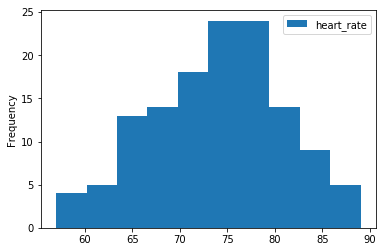

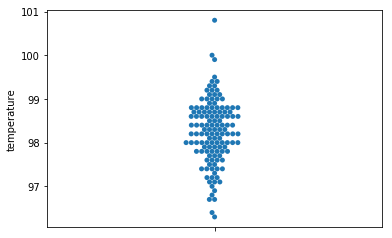

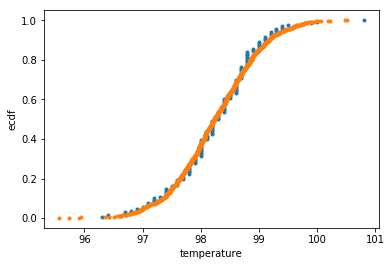

In [36]:
df.plot('temperature', kind='hist', bins=10)
plt.show()
sns.swarmplot(y='temperature', data = df)
plt.show()
ec_x, ec_y = ecdf(df['temperature'])
plt.plot(ec_x, ec_y, '.')
mean= np.mean(df['temperature'])
std = np.std(df['temperature'])
norm = np.random.normal(mean, std, size=1000)
ec_xn, ec_yn = ecdf(norm)
plt.plot(ec_xn, ec_yn, '.')
plt.xlabel('temperature')
plt.ylabel('ecdf')
plt.show()

Graphically, the distribution of body temperature in this sample looks roughly normal

In [18]:
shapiro = stats.shapiro(df['temperature'])
normtes = stats.normaltest(df['temperature'])
anderson = stats.anderson(df['temperature'])

print(shapiro)
print('')
print(normtes)
print('')
print(anderson)

(0.9865770936012268, 0.233174666762352)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

AndersonResult(statistic=0.52010388267143526, critical_values=array([ 0.56 ,  0.637,  0.765,  0.892,  1.061]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


Numerical results also suggest the normality we infered from the plots above, it seems as though human body temperatrues are normally distributed

# question 2

In [6]:
len(df)

130

* Sample size of 130 is greater than 30 so it is a large enough sample to fufil the normality condiditon if we hadn't already seen that the underlying data is roughly normal

* Sample size is less that 10% of the population so we can assume that individuals body temperatures are independent. 

# Question 3

Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

In [5]:
obs_mean= mean


In [6]:
hyp_mean = 98.6
std_d = std/np.sqrt(120)
std_d

0.066672238425943317

In [7]:
obs_temps = df['temperature']
hyp_temps = df['temperature'] - (mean-hyp_mean) # data if hyp is true

bs_sample = np.empty(10000)
for i in range(10000):
    bs_sample[i] = np.mean(np.random.choice(hyp_temps, size = len(hyp_temps)))# make distribution under asumption that hyp is true
print(sum(bs_sample <= mean)/len(bs_sample))

0.0


In [8]:
std_est = std/np.sqrt(len(hyp_temps))
t = (obs_mean- hyp_mean)/std_est
s = stats.t.cdf(t, df = len(hyp_temps))o
sz = stats.norm.cdf(t)
print('t score p value =' +str(s) ,'   ',
      'z score p value =' +str(sz))

t score p value =1.08257052408e-07     z score p value =2.17615758294e-08


I used a one sample test because here we are trying to compare our sample with a single value. Since we have large sample size we should be able to use a z statstic and distribution. I'd think that the t distribution would over estimate the p value because of the t distributions fatter tails. So it makes sense that the normal distribution gives a smaller p value.

# Qustion 4

Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [97]:
obs_temps = df['temperature']
hyp_temps = df['temperature'] - (mean-hyp_mean) # data if hyp is true

bs_sample = np.empty(1000)
for i in range(1000):
    bs_sample[i] = np.mean(np.random.choice(hyp_temps, size = 10))# make distribution under asumption that hyp is true
print('Bootstrapped p value =' +str(sum(bs_sample <= mean)/len(bs_sample)))

Bootstrapped p value =0.064


In [93]:
std_est = std/np.sqrt(10)
t = (obs_mean- hyp_mean)/std_est
z = (obs_mean- hyp_mean)/std_est
t_value = stats.t.cdf(t, df = 10)
z_value = stats.norm.cdf(z)
print('t score p value =' +str(t_value) ,'   ',
      'z score p value =' +str(z_value))

t score p value =0.0798942730947     z score p value =0.0644129203416


Since the sample size is small (< 30) we should probably use a t test

# Question 5

At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [35]:
obs_temps = df['temperature']

bs_sample = np.empty(10000)

for i in range(10000):
    bs_sample[i] = np.mean(np.random.choice(obs_temps, size = 1))# make distribution under asumption that hyp is true

print(np.percentile(bs_sample, [2.5, 97.5]))

[ 96.7  99.5]


In [38]:
MOE = 1.96*std/np.sqrt(1)
print(MOE)

1.43150124665


In [34]:
print(mean - 1.96*std, mean +1.96*std )

96.8177295225769 99.68073201588466


If we repeated this procedure we would expect 95% of the intervals produced to contain the population mean. Since our interval was  between 96.7 and 99.5  anyone with a body temperature outside of that range could reasonably be considered abnormal. 

# question 6 

Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

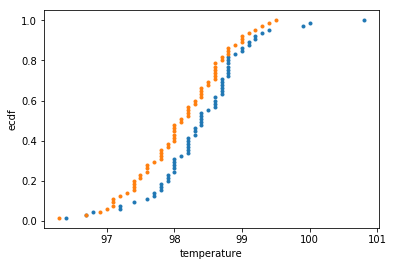

0.0214
Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)
[ 0.04769231  0.53388462]


In [102]:
obs_temp_f = df[df['gender']=='F']
obs_temp_m = df[df['gender'] == 'M']

obs_temp_f = obs_temp_f['temperature']
obs_temp_m = obs_temp_m['temperature']



obs_temp_f_mean = np.mean(obs_temp_f)
obs_temp_m_mean = np.mean(obs_temp_m)

obs_temp_f_std = np.std(obs_temp_f)
obs_temp_m_std = np.std(obs_temp_m)

obs_temp_f_std_est = np.std(obs_temp_f)/len(obs_temp_f)
obs_temp_m_std_est = np.std(obs_temp_m)/len(obs_temp_m)


empirical_diff_means = obs_temp_f_mean - obs_temp_m_mean


mean_temp = np.mean(obs_temps)


x_f, y_f = ecdf(obs_temp_f)
x_m, y_m = ecdf(obs_temp_m)
plt.plot(x_f, y_f, '.')
plt.plot(x_m, y_m, '.')
plt.xlabel('temperature')
plt.ylabel('ecdf')
plt.legend()
plt.show()



# Generate shifted arrays
obs_temp_m_shifted = obs_temp_m - np.mean(obs_temp_m) + mean_temp
obs_temp_f_shifted = obs_temp_f - np.mean(obs_temp_f) + mean_temp

bs_sample_m = np.empty(10000)
bs_sample_f = np.empty(10000)

for i in range(10000):
    bs_sample_m[i] = draw_bs_reps(obs_temp_m_shifted, np.mean)
    bs_sample_f[i] = draw_bs_reps(obs_temp_f_shifted, np.mean)
mean_diff_bs = bs_sample_f - bs_sample_m
print(sum(abs(mean_diff_bs) >= empirical_diff_means)/len(mean_diff_bs))


tt = stats.ttest_ind(obs_temp_f, obs_temp_m)
print(tt)




bs_sample_m = np.empty(10000)
bs_sample_f = np.empty(10000)

for i in range(10000):
    bs_sample_m[i] = draw_bs_reps(obs_temp_m, np.mean)
    bs_sample_f[i] = draw_bs_reps(obs_temp_f, np.mean)
mean_diff_bs = bs_sample_f - bs_sample_m

#print(np.percentile(bs_sample_m, [2.5,97.5]),np.percentile(bs_sample_f, [2.5,97.5]) )
print(np.percentile(mean_diff_bs, [2.5,97.5]))

For this problem I started by bootstrapping a two sample test where my hypotheses were 

H0: $mu1 - mu2 = 0

Ha: mu1 - mu2 != 0 

I also ran a t test for independent means  with the same hypothesis to double check. I did both of these as two sample tests because we have two seemingly independent populations that we want to compare. This is a two tailed test so I added the absolute value of the difference in means instead of just the difference in means.

Using an alpha of 0.05, we could reject our null hypothesis and conclude that there is likely a difference in body temperatrues between men and women which matches the large gap we see in the ecdf plot. The confidence interval of the difference of means runs from 0.043 to 0.541. Which means we expect 95% of intervals created with this method to contain the true difference of means 